In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [8]:
df = pd.read_csv('C:/Users/Timii/Documents/Dev/Zummit/AI-ML-Learning-Path/grid_search/creditcard.csv')

In [9]:
df.sample(4)

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
75503,75503,56096.0,-0.179354,1.300668,1.452030,2.072387,-0.023170,0.183269,-0.139483,-1.592838,...,1.514773,-0.577706,0.025543,0.375403,0.760423,-0.008269,0.187614,0.220336,6.27,0
14256,14256,25314.0,-1.435505,0.998043,0.993314,-1.736552,-1.290577,-1.157450,-0.512701,0.822639,...,-0.064796,-0.493533,-0.017481,0.333112,0.472072,-0.533063,0.066471,-0.046971,10.00,0
36226,36226,38444.0,-0.792759,1.097730,1.202137,-0.204173,0.399759,-0.555503,0.994699,0.004239,...,0.128160,0.411448,-0.173366,0.050901,-0.007166,-0.541285,0.240144,0.196356,22.64,0
8842,8842,12093.0,-4.696795,2.693867,-4.475133,5.467685,-1.556758,-1.549420,-4.104215,0.553934,...,0.573898,-0.080163,0.318408,-0.245862,0.338238,0.032271,-1.508458,0.608075,0.00,1


In [10]:
df['Class'].value_counts()

0    79804
1      196
Name: Class, dtype: int64

In [11]:
X = df.drop(columns=['Time', 'Amount', 'Class']).values
y = df['Class'].values

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, make_scorer

def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

grid = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
 param_grid={'class_weight':[{0:1, 1:v} for v in np.linspace(1, 20, 30)]},
 scoring={'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
             'min_both':make_scorer(min_recall_precision)},
 refit='min_both',
 return_train_score=True,
 cv=5,
 n_jobs=-1)

grid.fit(X, y)

In [ ]:
result_df = pd.DataFrame(grid.cv_results_)
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,mean_test_min_both,std_test_min_both,rank_test_min_both,split0_train_min_both,split1_train_min_both,split2_train_min_both,split3_train_min_both,split4_train_min_both,mean_train_min_both,std_train_min_both
0,1.701711,0.300342,0.049156,0.010782,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",0.008059,0.709677,0.958333,0.928571,...,0.390714,0.269390,30,0.738854,0.592357,0.566879,0.585987,0.660256,0.628867,0.063398
1,1.596533,0.381540,0.038225,0.003596,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",0.005760,0.750000,0.961538,0.933333,...,0.466408,0.280581,29,0.828025,0.643312,0.662420,0.649682,0.730769,0.702842,0.069935
2,1.810358,0.307553,0.038585,0.001452,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",0.005146,0.756098,0.962963,0.933333,...,0.499172,0.285742,28,0.853503,0.681529,0.700637,0.694268,0.775641,0.741115,0.065126
3,1.599147,0.165132,0.041148,0.002491,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",0.004939,0.767442,0.962963,0.933333,...,0.511399,0.283281,27,0.859873,0.745223,0.726115,0.719745,0.777070,0.765605,0.051178
4,1.623138,0.270738,0.040088,0.001856,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",0.004801,0.767442,0.964286,0.933333,...,0.516500,0.286311,25,0.866242,0.789809,0.745223,0.751592,0.779874,0.786548,0.043211
5,1.525439,0.216945,0.047657,0.009439,"{0: 1, 1: 4.275862068965517}","{'class_weight': {0: 1, 1: 4.275862068965517}}",0.004723,0.733333,0.964286,0.933333,...,0.514663,0.278847,26,0.872611,0.815287,0.770701,0.757962,0.782609,0.799834,0.041071
6,1.495662,0.254074,0.057911,0.010588,"{0: 1, 1: 4.931034482758621}","{'class_weight': {0: 1, 1: 4.931034482758621}}",0.004675,0.739130,0.964286,0.935484,...,0.530940,0.280958,24,0.878981,0.821656,0.784810,0.770701,0.783951,0.808020,0.039325
7,1.701487,0.104043,0.055592,0.008395,"{0: 1, 1: 5.586206896551724}","{'class_weight': {0: 1, 1: 5.586206896551724}}",0.004630,0.739130,0.966667,0.935484,...,0.546188,0.286559,23,0.878981,0.821656,0.787879,0.789809,0.785276,0.812720,0.035681
8,1.767273,0.345075,0.046536,0.006886,"{0: 1, 1: 6.241379310344827}","{'class_weight': {0: 1, 1: 6.241379310344827}}",0.004602,0.739130,0.966667,0.941176,...,0.571567,0.297173,22,0.878981,0.834395,0.795181,0.788820,0.785276,0.816530,0.035832
9,1.832033,0.289228,0.056546,0.015668,"{0: 1, 1: 6.896551724137931}","{'class_weight': {0: 1, 1: 6.896551724137931}}",0.004579,0.739130,0.966667,0.941176,...,0.576562,0.296987,20,0.878981,0.831250,0.795181,0.790123,0.787879,0.816683,0.034902


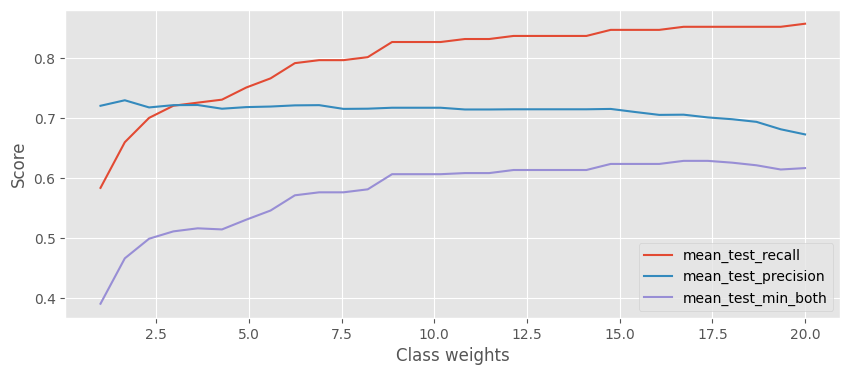

In [ ]:
plt.figure(figsize=(10,4))
for score in ['mean_test_recall', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot([i[1] for i in result_df['param_class_weight']],
             result_df[score], label=score)
plt.xlabel('Class weights')
plt.ylabel('Score')
plt.legend();

In [ ]:
# END